In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [20]:
SA = 'SA'
SMAG = 'SMAG'
smiDNS = 'smiDNS'

path_SA = f'/home/hmarefat/scratch/torchFOAM/Case_{SA}/500/' 
path_SMAG = f'/home/hmarefat/scratch/torchFOAM/Case_{SMAG}/500/' 
path_smiDNS = f'/home/hmarefat/scratch/torchFOAM/Case_{smiDNS}/500.511149469398163/' 

path_smiDNS

'/home/hmarefat/scratch/torchFOAM/Case_smiDNS/500.511149469398163/'

In [3]:
def fileReader(path):
    var = []
    skipped = 20
    with open(path, 'r') as f:
        for _ in range(skipped):
            next(f)
        rows = int(f.readline())
        f.readline()
        for _ in range(rows):
            var.append(float(f.readline()))
    f.close()
    
    return var

In [4]:
from sklearn.preprocessing import StandardScaler

def normalizer(data):
    scaler = StandardScaler()
    data_reshaped = data.reshape(-1, 1) 
    scaler.fit(data_reshaped)
    data_norm = scaler.transform(data_reshaped)
    
    return data_norm, scaler.mean_, scaler.scale_

In [23]:
"""
SA_Rs = np.array(fileReader(path_SA+'Rg'))
SA_Qs = np.array(fileReader(path_SA+'Qg'))
SA_Rs_norm, _, _ = normalizer(SA_Rs) 
SA_Qs_norm, _, _ = normalizer(SA_Qs)

SMAG_Rs = np.array(fileReader(path_SMAG+'Rg'))
SMAG_Qs = np.array(fileReader(path_SMAG+'Qg'))
SMAG_Rs_norm, _, _ = normalizer(SMAG_Rs) 
SMAG_Qs_norm, _, _ = normalizer(SMAG_Qs)
"""
smiDNS_Rs = np.array(fileReader(path_smiDNS+'Rg'))
smiDNS_Qs = np.array(fileReader(path_smiDNS+'Qg'))
smiDNS_Rs_norm, _, _ = normalizer(smiDNS_Rs) 
smiDNS_Qs_norm, _, _ = normalizer(smiDNS_Qs)






In [24]:
smiDNS_data = np.column_stack([smiDNS_Rs, smiDNS_Qs])
smiDNS_kde = gaussian_kde(smiDNS_data.T)

<function matplotlib.pyplot.show(close=None, block=None)>

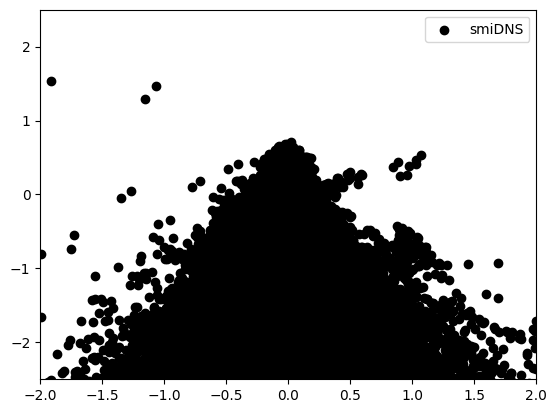

In [25]:
plt.scatter(smiDNS_Rs, smiDNS_Qs, color='black', label='smiDNS') 
#plt.scatter(SMAG_Rs, SMAG_Qs, color='blue', label='SMAG') 
#plt.scatter(SA_Rs, SA_Qs, color='green', label='SA') 
plt.xlim([-2, 2]) 
plt.ylim([-2.5,2.5]) 
plt.legend() 
plt.show

In [26]:
n = 50000 
smaller_grid_x = smiDNS_Rs_norm[::n]
smaller_grid_y = smiDNS_Qs_norm[::n]

xi, yi = np.meshgrid(smaller_grid_x, smaller_grid_y)
grid_points = np.vstack([xi.ravel(), yi.ravel()])

batch_size = 10000  
n_batches = int(np.ceil(grid_points.shape[1] / batch_size))


In [27]:
n_batches

1

In [28]:
zi_batches = []
for i in range(n_batches):
    print(i)
    start_index = i * batch_size
    end_index = start_index + batch_size
    batch_points = grid_points[:, start_index:end_index]
    zi_batch = smiDNS_kde(batch_points)
    zi_batches.append(zi_batch)

zi_concat = np.concatenate(zi_batches)


0


/tmp/ipykernel_447992/2491546671.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(xi, yi, zi_concat.reshape(xi.shape), shading='auto')


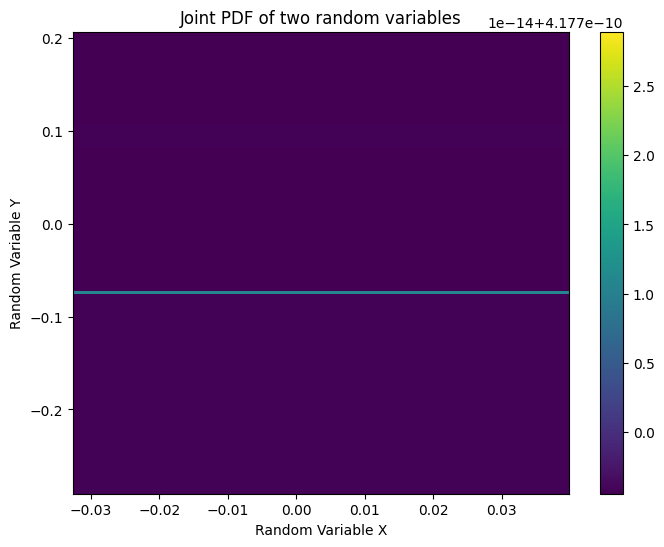

In [32]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(xi, yi, zi_concat.reshape(xi.shape), shading='auto')
plt.colorbar()
#plt.clim(-1, 1)
plt.xlabel('Random Variable X')
plt.ylabel('Random Variable Y')
plt.title('Joint PDF of two random variables')
plt.show()

In [ ]:
SMAG_Rs.shape

In [ ]:
xi, yi = np.meshgrid(SA_Rs, SA_Qs, sparse=True)


In [ ]:
np.random.seed(0)
x = np.random.normal(size=1000)
y = np.random.normal(size=1000)

# Create a 2D array of the two variables
data = np.vstack([x, y])
data.shape

In [ ]:
SA_Rs_norm.squeeze().shape

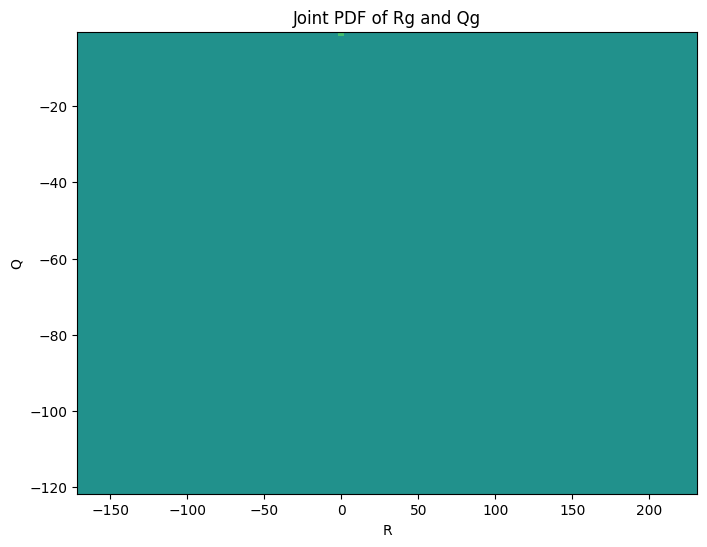

In [38]:
from scipy.integrate import trapz

x = smiDNS_Rs_norm.squeeze()
y = smiDNS_Qs_norm.squeeze()

n, xedges, yedges = np.histogram2d(x, y, bins=[100, 101])
jpdf = n / trapz(trapz(n, xedges[:-1], axis=0), yedges[:-1])

# Create the mesh for the contour plot
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])

# Add contour lines of the JPDF
plt.figure(figsize=(8, 6))
plt.pcolormesh(X, Y, jpdf.T)  # Transpose jpdf to match the dimensions of X and Y
plt.clim([-1,1])
#plt.colorbar()  # Optionally add a colorbar to see the density scale
plt.xlabel('R')
plt.ylabel('Q')

plt.title('Joint PDF of Rg and Qg')
plt.show()

In [ ]:
smiDNS_Rs.shape, smiDNS_Qs.shape

In [ ]:
SMAG_Rs.shape, SMAG_Qs.shape

In [ ]:
zi_concat

In [ ]:
xi, yi = np.meshgrid(SA_Rs, SA_Qs, sparse=True)
grid_points = np.vstack([xi.ravel(), yi.ravel()])

In [ ]:
grid_points.shape

In [ ]:
zi = SA_kde(grid_points)

In [ ]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto')
plt.colorbar()
plt.xlabel('Random Variable X')
plt.ylabel('Random Variable Y')
plt.title('Joint PDF of two random variables')
plt.show()
